# TME3: introduction à Numpy

> Consignes: le fichier TME3_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en TME3_nom1_nom2.ipynb.

## Exercice 1: 
Implémenter les exemples vu en TD. Imprimer les tableaux résultats pour vérification. 

In [3]:
from PIL import Image
import numpy as np

### 1.1: Création de tableau; dimension; taille et type

In [4]:
A=np.array(list(range(100))).reshape(10,10)
A.dtype

dtype('int32')

In [6]:
B=np.array(A,dtype='uint8')
B.dtype,B

(dtype('uint8'), array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], dtype=uint8))

In [15]:
C=np.array(A,dtype='single')
print(C.dtype,C)
D=np.array(A,dtype='double')
print(D.dtype,D)


float32 [[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
 [50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]
 [60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]
 [70. 71. 72. 73. 74. 75. 76. 77. 78. 79.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]
float64 [[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
 [50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]
 [60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]
 [70. 71. 72. 73. 74. 75. 76. 77. 78. 79.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]


In [16]:
D.ndim,D.shape, D.size


(2, (10, 10), 100)

In [17]:
E=np.zeros(100)
E

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
F=np.zeros(20*30).reshape(20,30)
F

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [21]:
G=np.full((20,30,3),255)
G

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### 1.2: Parcours de tableaux

In [26]:
E=np.array(list(range(600))).reshape(20,30)
n,m=E.shape
moyenne =0
for x in range(n):
    for y in range(m):
        moyenne+=E[x,y]
print(moyenne/E.size)
        

299.5


In [30]:
x=np.empty((100))
for i in range(100):
    x[i] = (-(np.pi)+((2*np.pi)/99)*i)
x

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

In [33]:
#3
y=np.empty((100))
for i in range(100):
    y[i] =np.sin(x[i])

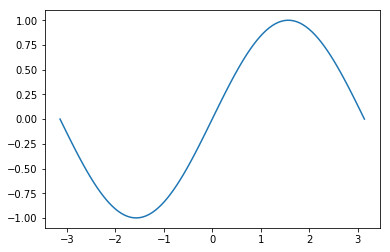

In [35]:
#4
from pylab import *
plot(x,y)
show()

In [36]:
z=zeros((100,100))
n,m=100,100
for i in range(n):
    for j in range(m):
        a=-3+i*6/99
        b=-3+j*6/99
        z[i][j] = exp(-a**2-b**2)

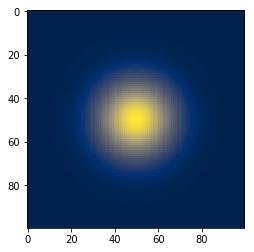

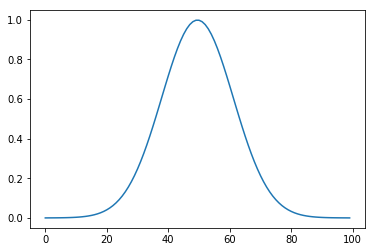

In [37]:
z[:,-1]=z[:,0]=0
z[0,:]=z[-1,:]=0

imshow(z,cmap='cividis')
show()
plot(z[49,:])
show()

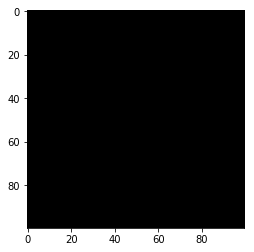

In [38]:
#7
z[1:-1,1:-1]=0
gray()
imshow(z)
show()

### 1.3


In [39]:
#1
E.mean()

299.5

In [40]:
#2
x=linspace(-pi,pi,100)
x=arange(-pi,pi+2*pi/99,2*pi/99)
x

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

In [41]:
y=sin(x)

In [42]:
A=arange(7).reshape((7,1))
B=ones((1,7))
print(A,B,matmul(A,B))
X=matmul(ones((100,1)),x.reshape((1,100)))
Y=X.T

X*Y

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]] [[1. 1. 1. 1. 1. 1. 1.]] [[0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6.]]


array([[ 9.8696044 ,  9.67021845,  9.47083251, ..., -9.47083251,
        -9.67021845, -9.8696044 ],
       [ 9.67021845,  9.47486051,  9.27950256, ..., -9.27950256,
        -9.47486051, -9.67021845],
       [ 9.47083251,  9.27950256,  9.08817261, ..., -9.08817261,
        -9.27950256, -9.47083251],
       ...,
       [-9.47083251, -9.27950256, -9.08817261, ...,  9.08817261,
         9.27950256,  9.47083251],
       [-9.67021845, -9.47486051, -9.27950256, ...,  9.27950256,
         9.47486051,  9.67021845],
       [-9.8696044 , -9.67021845, -9.47083251, ...,  9.47083251,
         9.67021845,  9.8696044 ]])

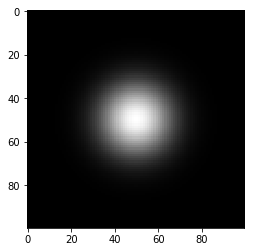

In [43]:
Z=exp(-X*X-Y*Y)
imshow(Z)
show()

In [44]:
#5
from numpy import *
a=random.randint(0,10,120).reshape((12,10))
(a==5).sum()

9

### 1.4 PIL et Numpy

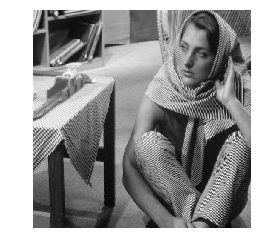

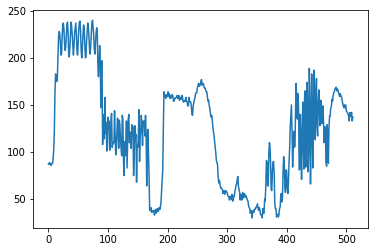

In [49]:
from PIL import Image

barb=array(Image.open('img/barbara.png'))
n,m=barb.shape
imshow(barb)
axis("off")
show()
plot(barb[n//2,:])
show()

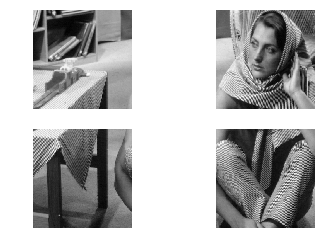

In [50]:
I1=barb[:n//2,:m//2]
I2=barb[:n//2,m//2:]
I3=barb[n//2:,:m//2]
I4=barb[n//2:,m//2:]

subplot(2,2,1)
axis("off")
imshow(I1)
subplot(2,2,2)
axis("off")
imshow(I2)
subplot(2,2,3)
axis("off")
imshow(I3)
subplot(2,2,4)
axis("off")
imshow(I4)
show()

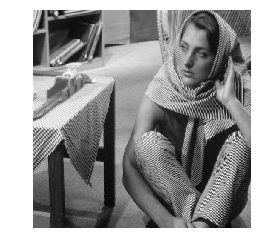

In [52]:
I=vstack((hstack((I1,I2)),hstack((I3,I4))))
imshow(I)
axis("off")
show()

((512, 512), (256, 256))

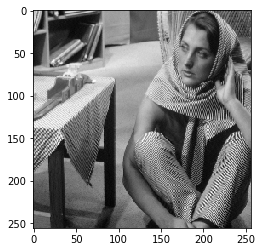

In [53]:
J=I[::2,::2]
imshow(J)
I.shape,J.shape

## Exercice 2: Numpy et les images

### 2.1 Normalisation
Normaliser l'image `img/seiche.png`. Indication: utiliser les méthodes `min()` et `max()` de la classe `ndarray`. Afficher l'image PIL `seiche.png` puis le tableau numpy normalisé. Ps: si l'image numpy apparait colorée, utiliser la fonction gray() qui fixe la palette de couleurs d'`imshow()` en niveaux de gris.

min max original 27 172
min max normalisé 0 255


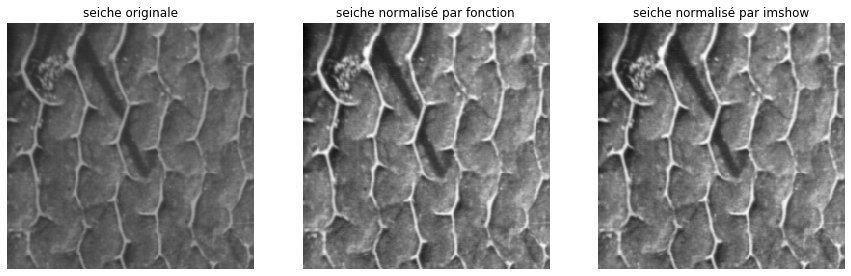

In [7]:
from PIL import Image
from pylab import *
plt.rcParams['figure.figsize']=[15,7]

seiche = Image.open("img/seiche.png")
seiche_array = np.array(seiche,dtype='int32')
kmini = np.min(seiche_array)
kmaxi = np.max(seiche_array)

norme_array=(seiche_array-kmini)*(255)/(kmaxi-kmini)
#norme_array=around(norme_array)
norme_array=norme_array.astype('int32')

print("min max original",kmini,kmaxi)
print("min max normalisé",np.min(norme_array),np.max(norme_array))

subplot(131)
title("seiche originale")
axis('off')
imshow(seiche_array, cmap = 'gray',vmin=0,vmax=255)
subplot(132)
title("seiche normalisé par fonction")
axis('off')
imshow(norme_array, cmap = 'gray')
subplot(133)
title("seiche normalisé par imshow")
axis('off')
imshow(seiche_array, cmap = 'gray')
show()

### 2.2 Visualisation PIL et Numpy
Lire l'image `img/CT-scan.png` (une coupe d'une acquisition d'un scanner X d'un corps humain) avec PIL et sa classe `Image`. Imprimer les extremas de l'image et l'image PIL. Transformer-là en tableau Numpy. A nouveau afficher ce tableau sous forme d'image. Que constatez-vous ?

(0, 2244)


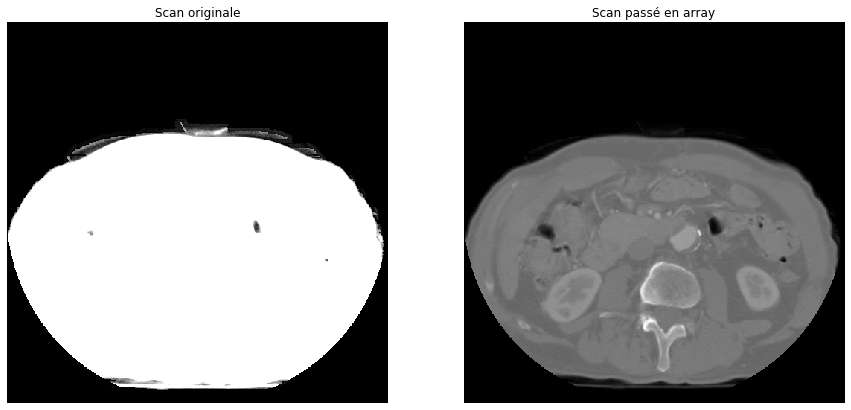

On ne peut voir l'image que sur 256 niveaux de gris, d'où l'affichage en blanc pour toute les valeurs supérieurs à 255 ( jusqu'à le max 2244).
Imshow effectue automatiquement une normalisation dans le tableau sur les niveaux de gris afin que l'on puisse voir les détails de la photo.


In [17]:
ct_scan = Image.open("img/CT-scan.png")
print(ct_scan.getextrema())

subplot(121)
title("Scan originale")
axis('off')
imshow(ct_scan,cmap="gray")

subplot(122)
title("Scan passé en array")
axis('off')
scan_array = np.array(ct_scan)
imshow(scan_array,cmap="gray")
show()

print("On ne peut voir l'image que sur 256 niveaux de gris, d'où l'affichage en blanc pour toute les valeurs supérieurs à 255 ( jusqu'à le max 2244).")
print("En passant par un tableau on arrive à voir des détails que l'on avait pas avant.")

### 2.3 Seuillage
Prendre le tableau numpy de la question précédente. Appliquer un seuillage haut au seuil 255. 
Remarque: cette opération se fait une instruction Python. Afficher le résultat sous forme d'image et comparer avec l'image PIL affichée à la question précédente. Qu'en déduisez vous du comportement de imshow() sur les images PIL ?

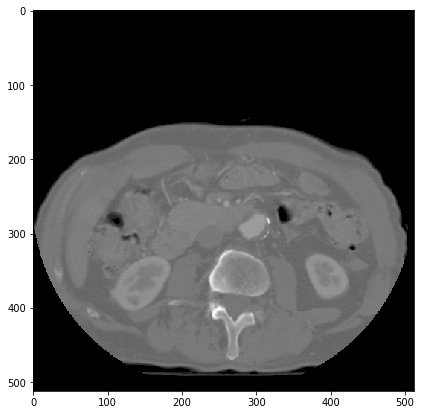

Imshow effectue automatiquement une normalisation dans le tableau sur les niveaux de gris afin que l'on puisse voir les détails de la photo.


In [19]:
S=255
scan_seuil=scan_array.copy()
scan_seuil[scan_array<S]=0
imshow(scan_seuil, cmap='gray')
show()

print("Imshow effectue automatiquement un seuillage sur les valeurs du tableau (sur les niveaux de gris) afin que l'on puisse voir les détails de la photo sur un format adapté (256 niveaux de gris).")

### 2.4 Seuillage - suite
Sur la même image, appliquer un seuillage à 1000 et commenter la visualisation de l'image seuillée. Essayer d'autres valeurs de seuils pour différentier certains organes.


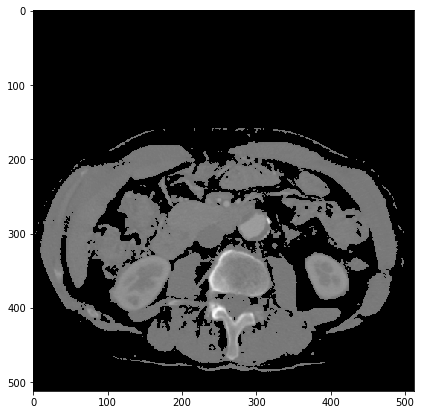

In [10]:
S=1000
scan_seuil_2=scan_array.copy()
scan_seuil_2[scan_array<S]=0
imshow(scan_seuil_2, cmap='gray')
show()

### 2.4 Damier
Comment fabriquer un image qui représente un damier (alternance de 6 cases blanches et 6 cases noires en ligne et en colonne), chaque case étant de taille 20 par 20. On pourra utiliser les fonctions `hstack()`, `vstack()` et `tile()`.

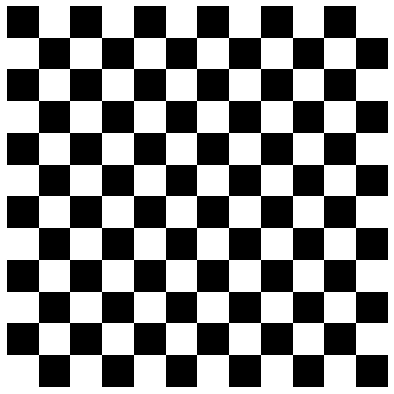

In [11]:
blanc=full((20,20),0)
noir=full((20,20),255)

H1=hstack((blanc,noir))
H2=hstack((noir,blanc))

V=vstack((H1,H2))

Damier=tile(V,(6,6))

axis('off')
imshow(Damier,cmap='gray')
show()

## Exercice 3: Manipulation et parcours de tableaux
### 3.1 Permutation de colonnes
Écrire un code Python qui créé un tableau `A` initialisé à des valeurs quelconque, ou bien une image lue sur le disque, construit un tableau `B` de même taille qui contient en première colonne la dernière colonne de `A`, et pour ses colonnes restantes, les premières colonnes de `A`. 


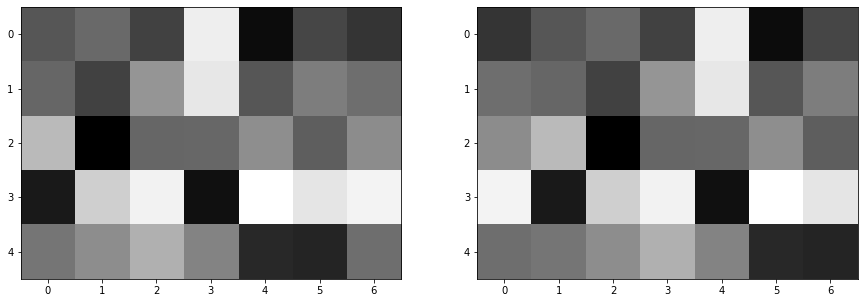

In [12]:
n=5
m=7
A=np.random.randint(0,255,n*m).reshape((n,m))

subplot(121)
imshow(A,cmap='gray')

B=array(A)
B[:,0]=A[:,-1]
B[:,1:m]=A[:,0:m-1]


subplot(122)
imshow(B,cmap='gray')

show()

### 3.2 Duplication de lignes et colonnes
Écrire un code Python qui prend le même tableau `A`, créé un tableau `A2` ayant 2 lignes et deux colonnes de plus que `A` et telque :
 - `A2` privé de ses premières et dernières lignes et colonnes doit valoir `A`. 
 - Les bords de `A2` doivent correspondre aux bords de `A`. Les valeurs aux coins de A2 ne devraient pas vous poser de problème !


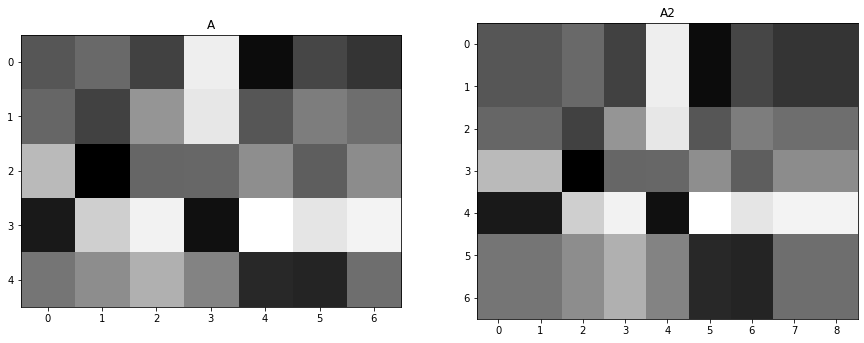

In [13]:
A2=G=zeros((n+2,m+2))

A2[1:n+1,1:m+1]=A #centre de A2

A2[0,1:m+1]=A[0,:] #haut de A2
A2[n+1,1:m+1]=A[n-1,:] #bas de A2
A2[1:n+1,0]=A[:,0] # gauche de A2
A2[1:n+1,m+1]=A[:,m-1]#droite de A2

A2[0,0]=(A2[0,1]+A2[1,0])/2 #coin gauche haut
A2[0,m+1]=(A2[0,m]+A2[1,m+1])/2 #coin droite haut
A2[n+1,0]=(A2[n,0]+A2[n+1,1])/2 #coin gauche bas
A2[n+1,m+1]=(A2[n,m+1]+A2[n+1,m])/2 #coin droite bas

subplot(121)
title("A")
imshow(A,cmap='gray')

subplot(122)
title("A2")
imshow(A2,cmap='gray')

show()

### 3.3 Temps de calcul
Reprendre l'exercice 2 du TME2 en utilisant Numpy: calculer les extremas d'un tableau numpy (de grande taille, par exemple l'image `../TME2/img/genies-math.jpg` convertie en niveaux de gris), en parcourant par indice les valeurs du tableau. Puis utiliser les méthodes `min()` et `max()`. Chronométrer les temps grâce aux fonctions `tic()` et `tac()`. Discuter ces temps.

In [56]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

###

def  extrema(tab):
    n,m=tab.shape
    vmin,vmax=tab[0][0],tab[0][0]
    for i in range(n):
        for j in range(m):
            if tab[i,j]>vmax: vmax=tab[i,j]
            if tab[i,j]<vmin: vmin=tab[i,j]
    return vmin,vmax

img_genie = Image.open("img/genies-math.jpg")
genie_gris=img_genie.convert('L')
genie_array= np.array(genie_gris)
print("Notre méthode d'extrema renvoie les valeurs ",end='')
tic()
print(extrema(genie_array),"en ",end='')
tac()
print("Les fonctions min et max renvoient les valeurs ",end='')
tic()
print((genie_array.min(),genie_array.max()),"en ",end='')
tac()
print("Cette différence de temps peut est tout à fait normal. Elle s'explique par le fait que la fonction que nous avons programmé est interprétée tandis que les fonctions de base de Numpy sont compilées par une bibliothèque faites en C qui est un langage plus bas que Python.")

Notre méthode d'extrema renvoie les valeurs (0, 255) en 3.875
Les fonctions min et max renvoient les valeurs (0, 255) en 0.015625
Cette différence de temps peut est tout à fait normal. Elle s'explique par le fait que la fonction que nous avons programmé est interprétée tandis que les fonctions de base de Numpy sont compilées par une bibliothèque faites en C qui est un langage plus bas que Python.
